Saving Housing.csv to Housing (2).csv
Shape of df: (545, 14)
MAE: 970043.4039201637
MSE: 1754318687330.6633
R² Score: 0.6529242642153185


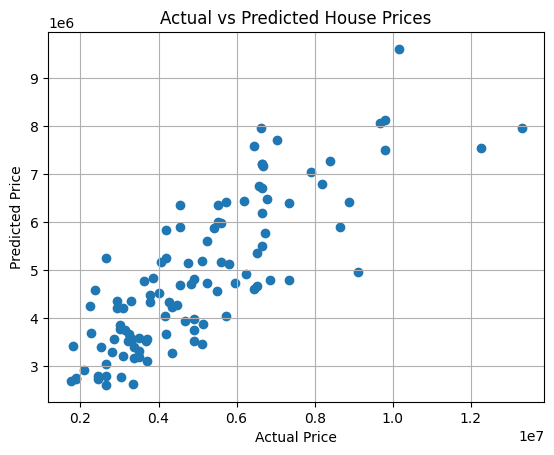

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Housing.csv")

# Step 2: Map 'yes'/'no' to 1/0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

# Step 3: One-hot encode 'furnishingstatus' if it exists
if 'furnishingstatus' in df.columns:
    df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

# Step 4: Check for missing values and fill them
df = df.fillna(df.mean(numeric_only=True))

# Step 5: Drop rows with any remaining missing values
df = df.dropna()

# Step 6: Confirm df is not empty
print("Shape of df:", df.shape)  # should be (non-zero, columns)

# Step 7: Prepare features and target
X = df.drop('price', axis=1)
y = df['price']

# Step 8: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 10: Predict and Evaluate
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Step 11: Plotting Predicted vs Actual
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()
